In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np
import os

import dataset_utils as utils


Python 3.6.8 |Anaconda, Inc.| (default, Feb 11 2019, 15:03:47) [MSC v.1915 64 bit (AMD64)] on win32
opencv version: 3.4.2


In [3]:
# load the stuff. Please set up the following paths:
prm_path_to_images = 'C:/p/herox/Data_Training'
prm_path_to_labels = 'C:/p/herox/training_GT_labels.json'
prm_path_to_results = 'C:/p/herox/results'

utils.load_labels(path_to_images=prm_path_to_images, path_to_labels=prm_path_to_labels)


found 9339 images and 9339 labels.
9339 images with labels
0 images without labels
0 labels without images
5 incomplete labels:
{'IMG_0688.JPG': [[]], 'IMG_6608.JPG': [[]], 'IMG_1343.JPG': [[]], 'IMG_5199.JPG': [[]], 'IMG_0492.JPG': [[]]}
9334 images with complete labels


({'IMG_8378.JPG': [616, 278, 948, 290, 945, 616, 609, 627],
  'IMG_3034.JPG': [502, 255, 663, 373, 673, 696, 492, 677],
  'IMG_2082.JPG': [504, 165, 829, 224, 819, 580, 489, 590],
  'IMG_7209 (1).JPG': [409, 285, 774, 292, 781, 642, 387, 646],
  'IMG_5207.JPG': [494, 311, 765, 267, 768, 663, 495, 644],
  'IMG_7597 (1).JPG': [616, 432, 706, 480, 705, 696, 616, 699],
  'IMG_9253.JPG': [212, 274, 533, 278, 533, 604, 210, 601],
  'IMG_6702.JPG': [606, 400, 720, 369, 724, 611, 601, 609],
  'IMG_6131.JPG': [509, 257, 599, 338, 597, 653, 504, 670],
  'IMG_5979.JPG': [409, 309, 561, 271, 563, 539, 416, 527],
  'IMG_7626.JPG': [452, 281, 820, 236, 831, 679, 451, 668],
  'IMG_0152.JPG': [547, 236, 853, 226, 874, 558, 532, 552],
  'IMG_3443.JPG': [523, 520, 623, 490, 613, 590, 511, 590],
  'IMG_7822.JPG': [687, 447, 732, 440, 732, 571, 689, 568],
  'IMG_7981.JPG': [317, 179, 931, 117, 957, 730, 298, 730],
  'IMG_6615.JPG': [521, 271, 777, 195, 787, 627, 513, 606],
  'IMG_2928.JPG': [589, 438, 625

In [4]:
g_dict_of_image_lists = utils.generate_lists_of_image_file_names(utils.g_work_list_of_images, good=True)
g_good_images = g_dict_of_image_lists['good']

for k in g_dict_of_image_lists:
    print('num of {} images: {}'.format(k, len(g_dict_of_image_lists[k])))


num of good images: 4659
num of not_good images: 4675
num of invalid images: 1085
num of gray_zone images: 854
num of ugly images: 2019
num of bad images: 3068


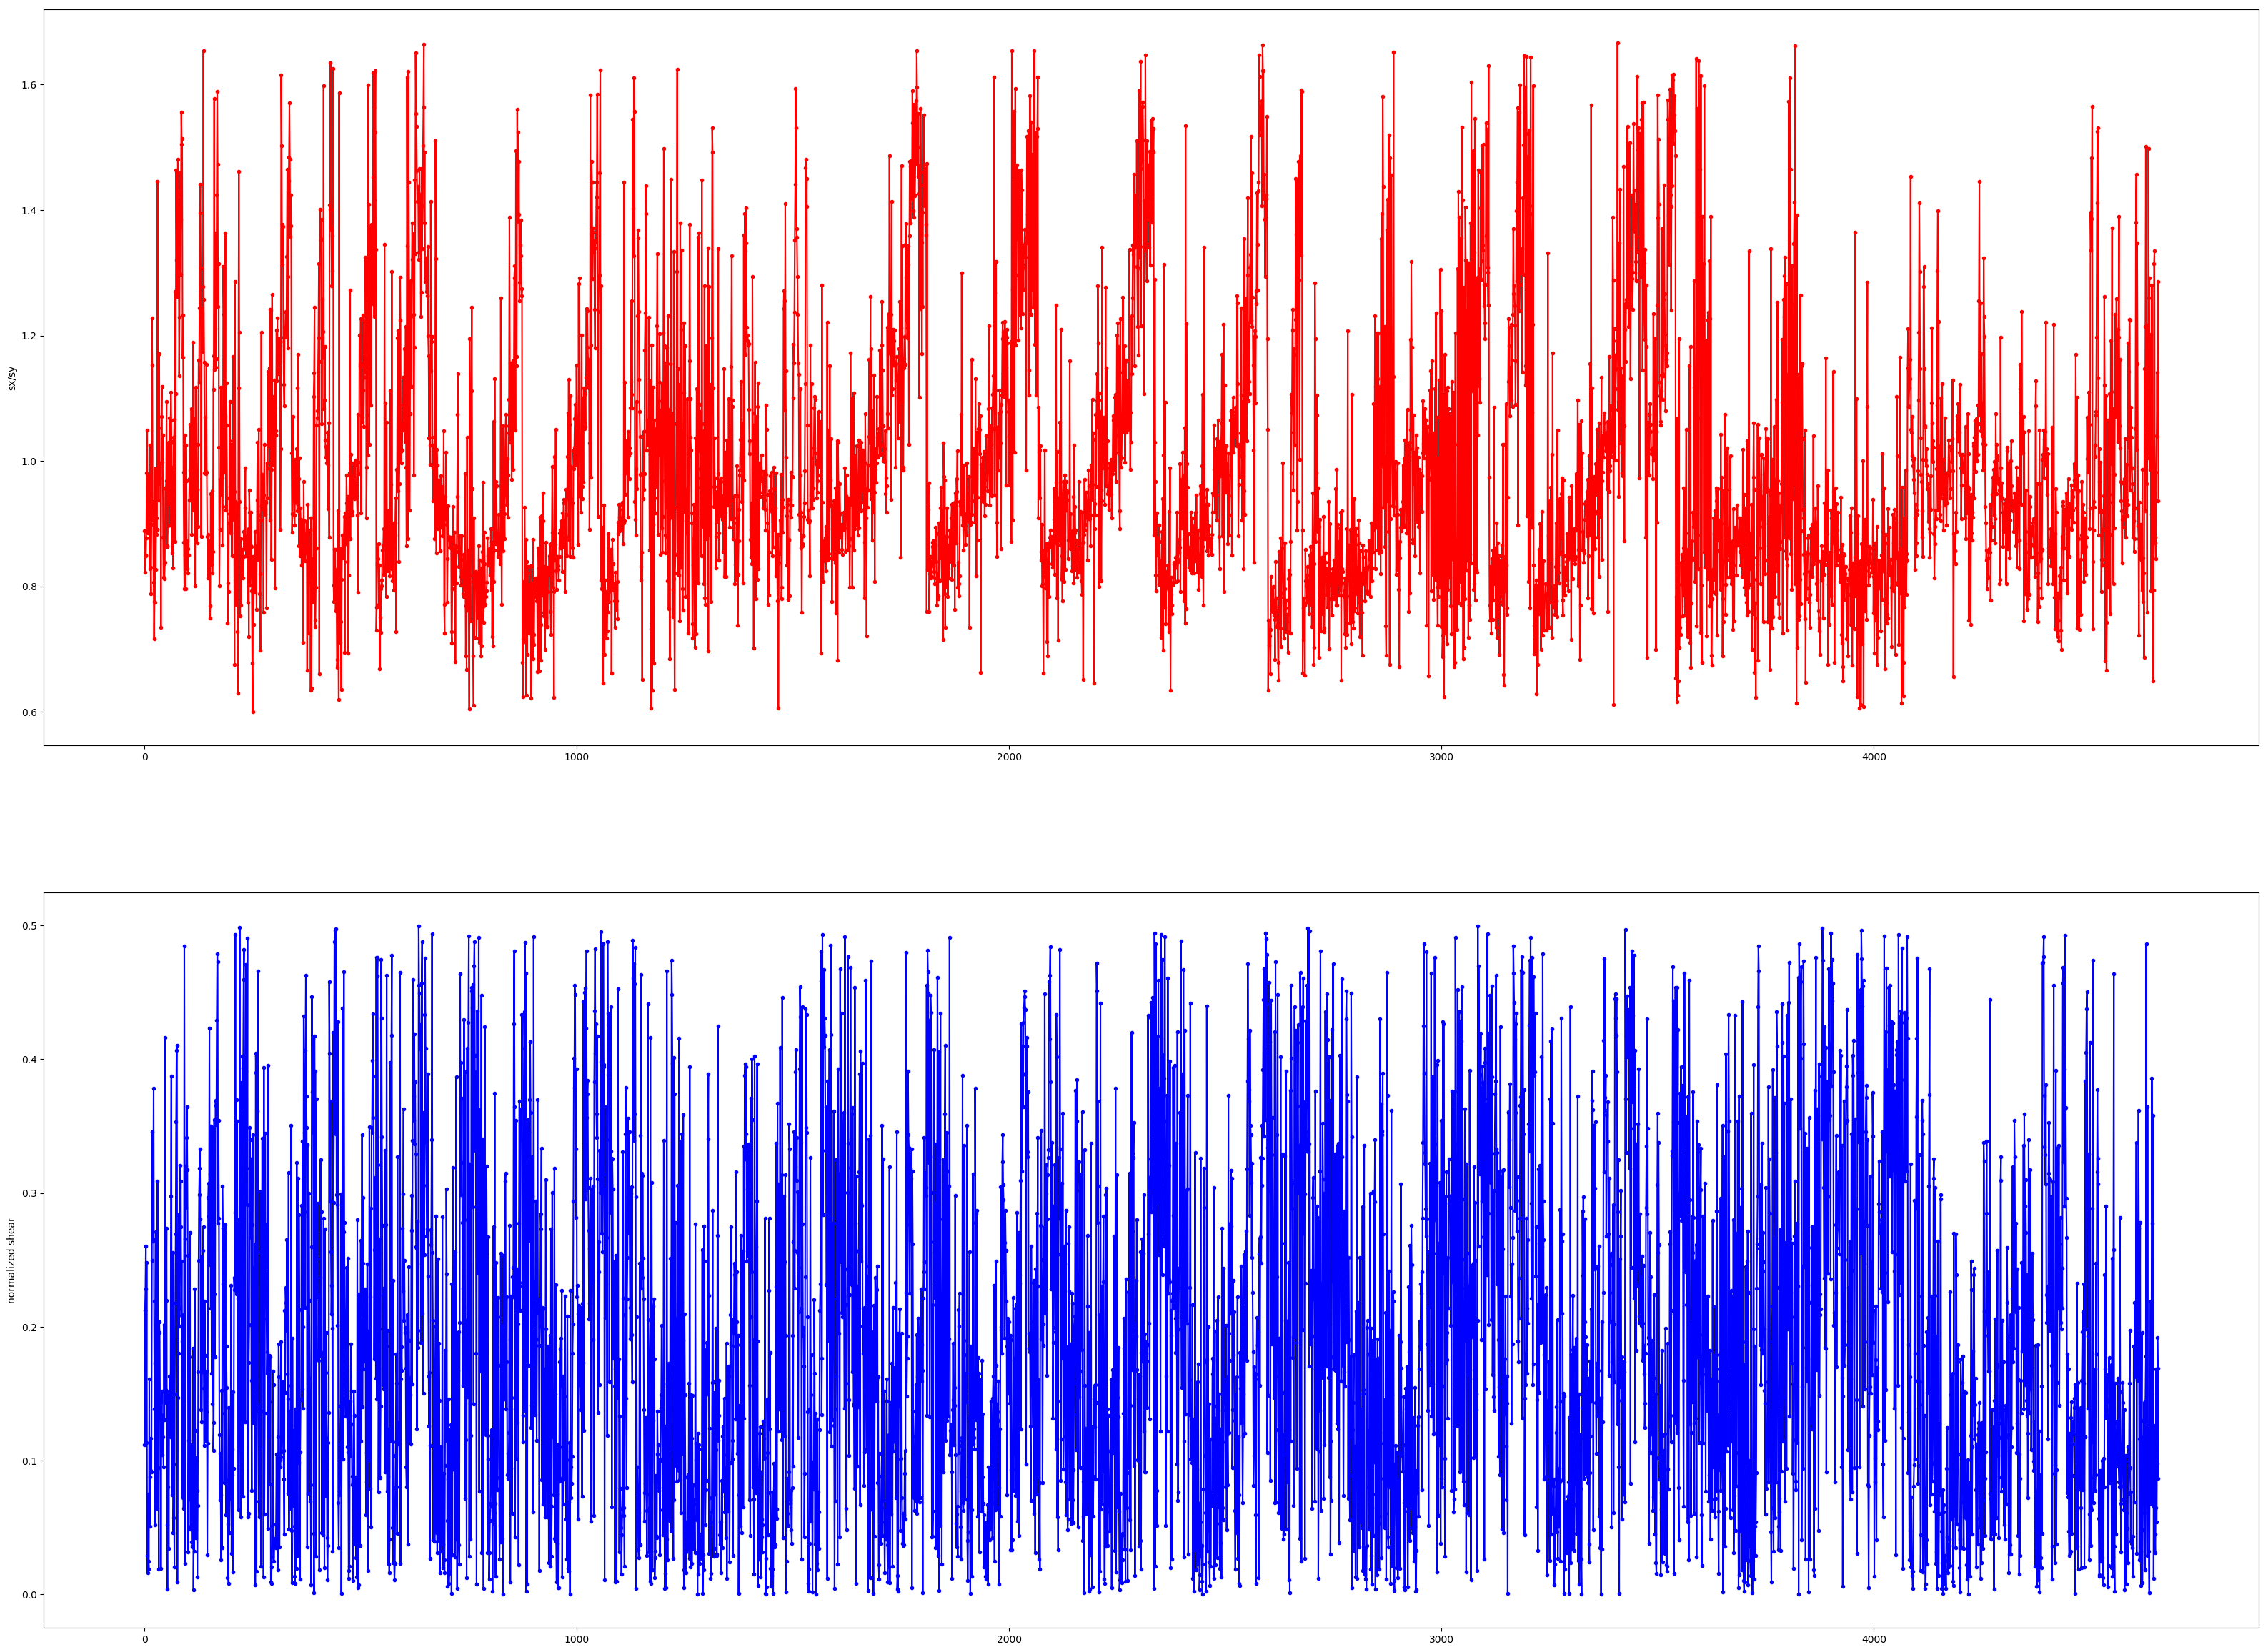

In [5]:
# let explore the camera invariants of images:

def plot_cam_invariants(image_file_names, y_axis1=None, y_axis2=None, use_log1=False, use_log2=False):
    cam_invariants = np.array(
        [utils.image_file_name_to_2d_cam_invariants(image_file_name)
         for image_file_name in image_file_names
        ],
        dtype = "float32")

    fig=plt.figure(figsize=(40, 30), dpi = 100)
    plt.subplot(2, 1, 1)
    if use_log1:
        plt.plot(np.log10(cam_invariants[:,0]), 'r.-')
    else:
        plt.plot(cam_invariants[:,0], 'r.-')
    plt.ylabel('sx/sy')
    if y_axis1:
        plt.axis([0, len(image_file_names), y_axis1[0], y_axis1[1]])
    plt.subplot(2, 1, 2)
    if use_log2:
        plt.plot(np.log10(cam_invariants[:,1]), 'r.-')
    else:
        plt.plot(cam_invariants[:,1], 'b.-')
    plt.ylabel('normalized shear')
    if y_axis2:
        plt.axis([0, len(image_file_names), y_axis2[0], y_axis2[1]])
    plt.show()

plot_cam_invariants(g_good_images)

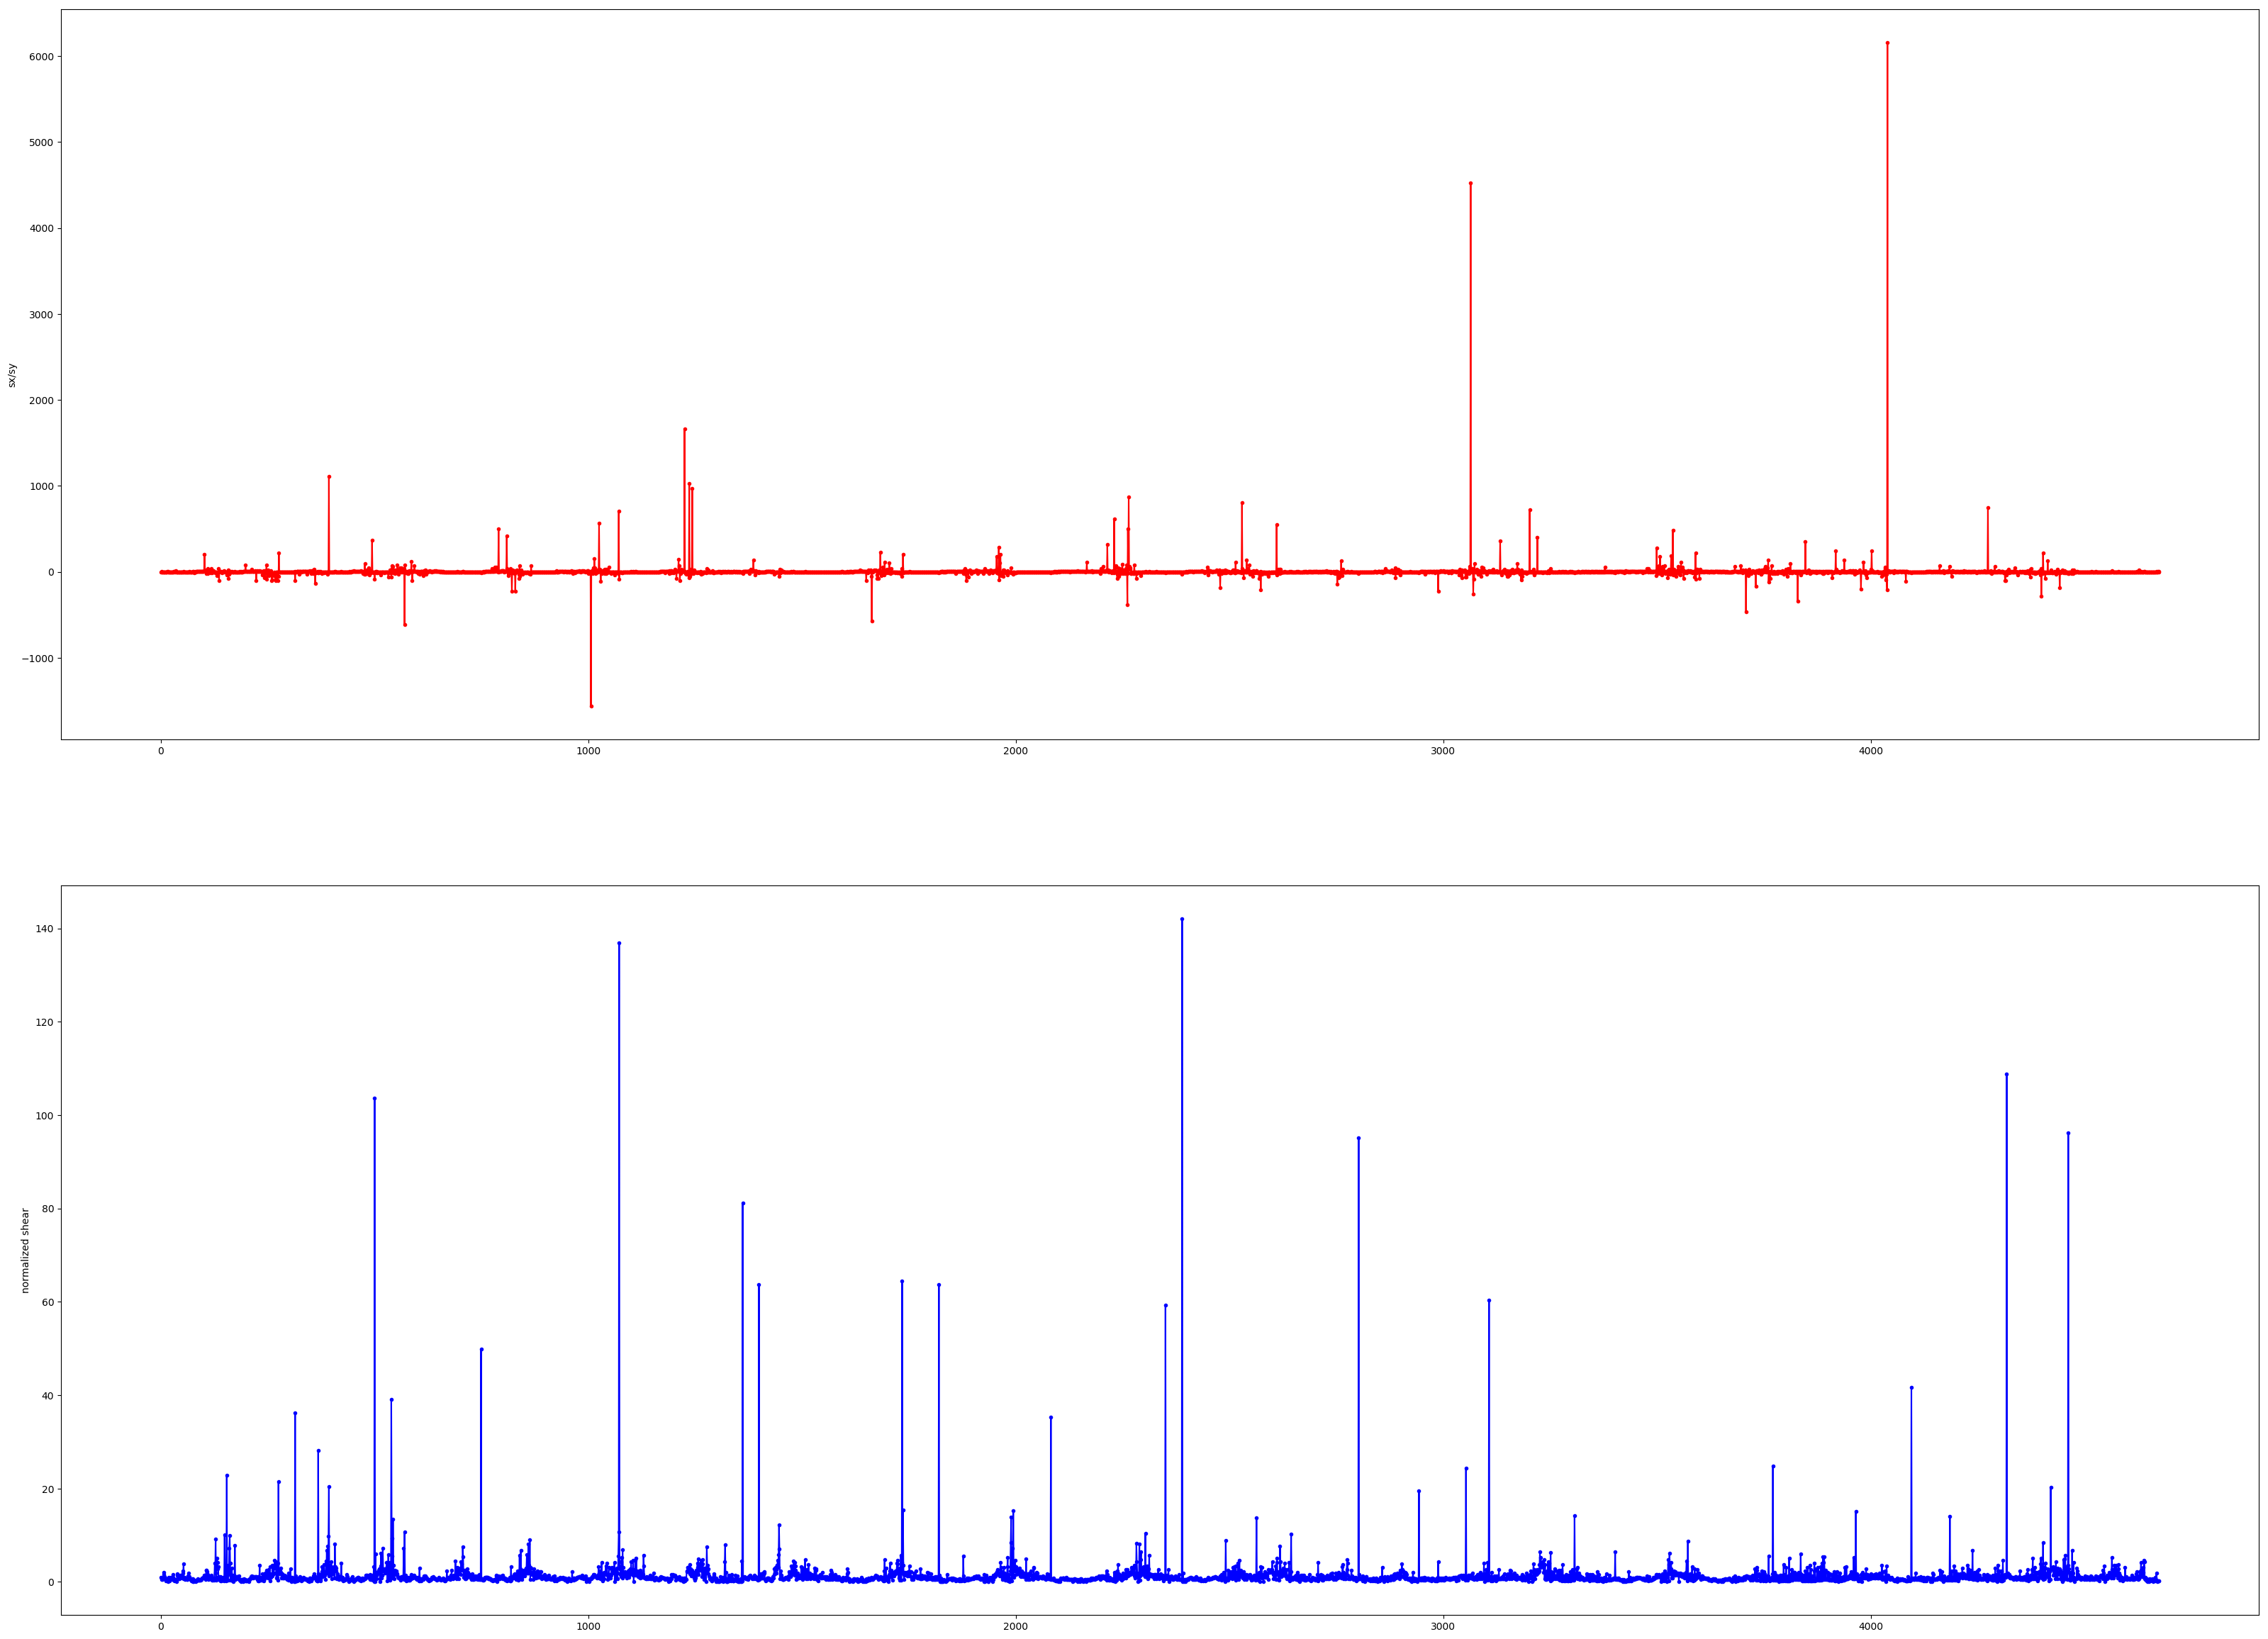

In [6]:
plot_cam_invariants(g_dict_of_image_lists['not_good'])

In [7]:
def write_exploration_images(dict_of_image_lists, path_to_results=prm_path_to_results):
    for k in dict_of_image_lists:
        utils.write_exploration_images(dict_of_image_lists[k], os.path.join(path_to_results, 'exploration', k))

#write_exploration_images(g_dict_of_image_lists)

In [17]:
# look into the images and labels:
g_current_image_file_name = ''

def display_stacked_explored_image(image_file_name):
    global g_current_image_file_name
    g_current_image_file_name = image_file_name
    label_image, image_labled_gate_coords = utils.get_image_and_gate_coords(image_file_name)
    label_image = utils.make_stacked_exploration_image(label_image, image_labled_gate_coords)
    fig=plt.figure(figsize=(40, 30), dpi = 100)
    plt.imshow(label_image)
    plt.show()


interact(display_stacked_explored_image, image_file_name=widgets.Dropdown(
    options=utils.g_work_list_of_images,
    value=utils.g_work_list_of_images[0],
    description='Work images:',
    disabled=False,
))


interactive(children=(Dropdown(description='Work images:', options=('IMG_0005.JPG', 'IMG_0006.JPG', 'IMG_0007.…

<function __main__.display_stacked_explored_image(image_file_name)>

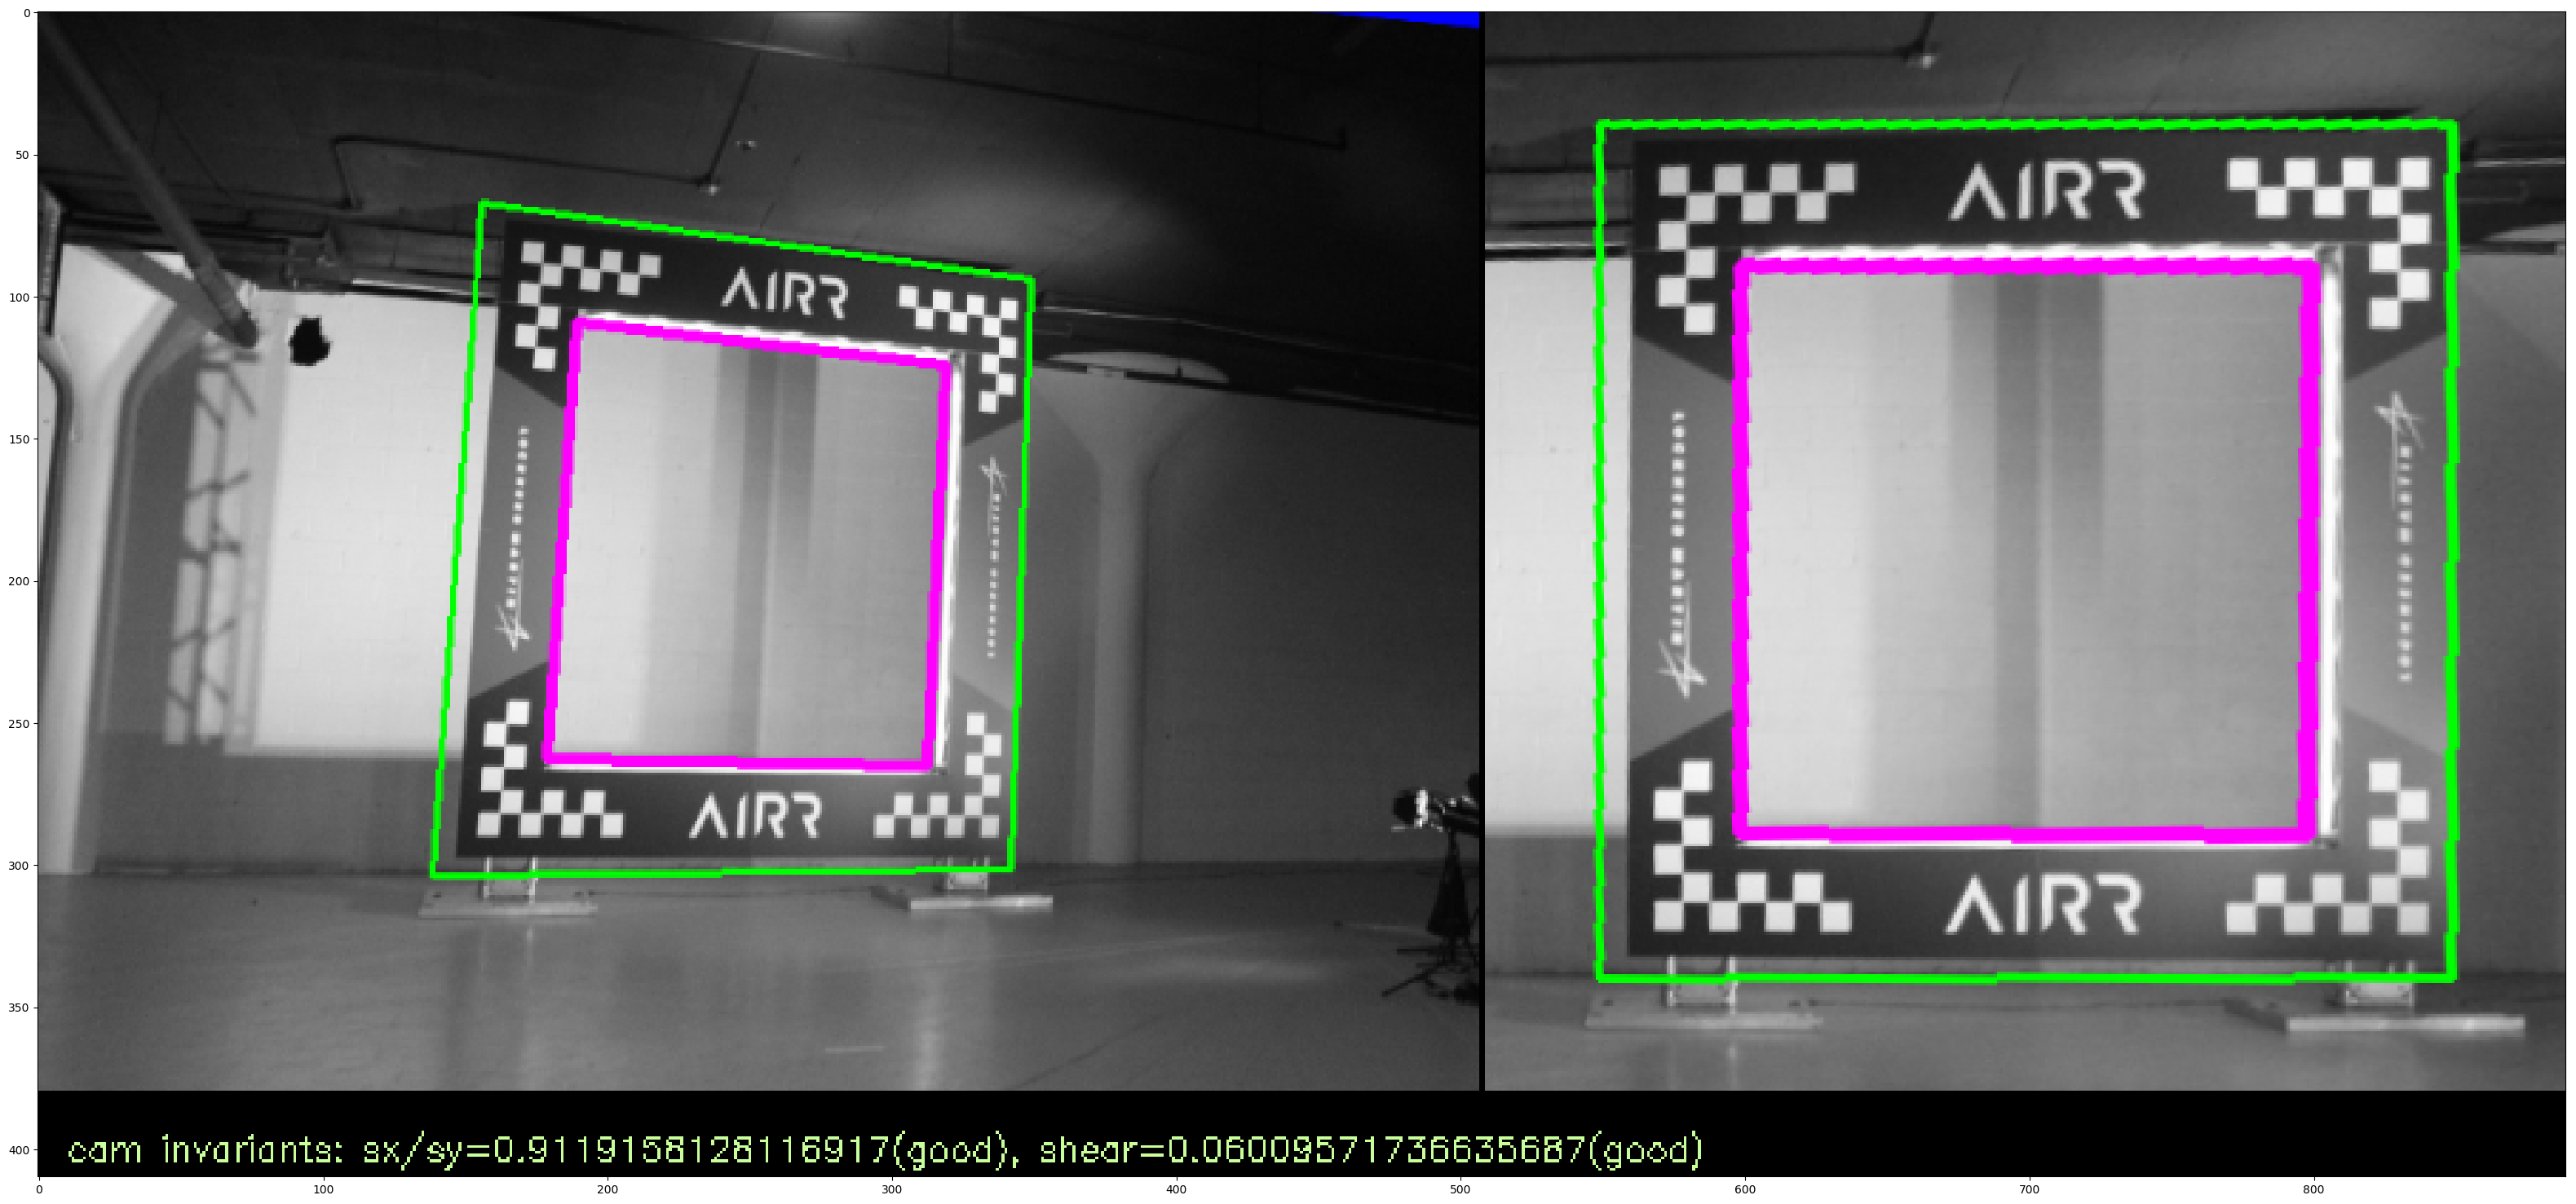

In [32]:
warped_image, warped_gate_coords = utils.make_warped_centered_image_and_label(
    g_current_image_file_name,
    sx=0.7, sy=0.7, shear=0., rot=0.1, nx=0.0002, ny=-0.0001)
fig=plt.figure(figsize=(40, 30), dpi = 100)
plt.imshow(warped_image)
plt.show()


In [25]:
utils.generate_frame_labels(g_good_images, os.path.join(prm_path_to_results, 'frame_labels.json'))

{'IMG_0005.JPG': [[357, 179, 755, 203, 759, 589, 356, 600]],
 'IMG_0006.JPG': [[221, 121, 674, 176, 674, 589, 212, 613]],
 'IMG_0007.JPG': [[290, 77, 770, 140, 782, 608, 287, 638]],
 'IMG_0012.JPG': [[214, -97, 891, 4, 908, 636, 209, 698]],
 'IMG_0013.JPG': [[460, 29, 1132, 54, 1154, 705, 433, 709]],
 'IMG_0015.JPG': [[411, 103, 1000, 79, 1029, 688, 390, 689]],
 'IMG_0016.JPG': [[304, 162, 844, 141, 865, 686, 325, 673]],
 'IMG_0022.JPG': [[341, 264, 701, 273, 707, 632, 330, 641]],
 'IMG_0024.JPG': [[303, 172, 802, 174, 809, 679, 289, 679]],
 'IMG_0028.JPG': [[292, 27, 971, 28, 977, 694, 298, 700]],
 'IMG_0029.JPG': [[328, 60, 984, 69, 994, 688, 321, 701]],
 'IMG_0032.JPG': [[348, 102, 939, 96, 974, 701, 332, 706]],
 'IMG_0035.JPG': [[260, 151, 773, 180, 794, 682, 229, 706]],
 'IMG_0036.JPG': [[374, 221, 836, 199, 824, 655, 369, 668]],
 'IMG_0037.JPG': [[417, 271, 824, 294, 825, 676, 411, 693]],
 'IMG_0039.JPG': [[454, 346, 774, 341, 785, 655, 442, 681]],
 'IMG_0040.JPG': [[541, 365, 83